# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Описание данных

● Name — название игры

● Platform — платформа

● Year_of_Release — год выпуска

● Genre — жанр игры

● NA_sales — продажи в Северной Америке (миллионы проданных копий)

● EU_sales — продажи в Европе (миллионы проданных копий)

● JP_sales — продажи в Японии (миллионы проданных копий)

● Other_sales — продажи в других странах (миллионы проданных копий)

● Critic_Score — оценка критиков (максимум 100)

● User_Score — оценка пользователей (максимум 10)

● Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


**Нужно выявить определяющие успешность игры закономерности.**




# ПЛАН РАБОТЫ

1. Загрузим датасет, предобработка данных, считаем суммарные продажи по регионам
2. Проанализируем : 
* сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* как менялись продажи по платформам

3. Выделим данные за актуальный период
5. Выберем самые потенциально прибыльные платформы и исследуем их
6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
7. Посмотрим влияние отзывов на продажи и распределения жанров

8. Найдём топ-5 платформ и жанров для регионов
9. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
10. Определим гипотезы и проверим их
11. Вывод

# Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy import stats

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сначала приведём названия колонок к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Year_of_Release - нужно к дате -- это год. 
df['year_of_release'] = pd.DatetimeIndex(pd.to_datetime(df['year_of_release'], format = '%Y')).year
print('доля пропусков = ', df.year_of_release.isna().sum() / len(df))

# Процент пропусков небольшой - удалим строки с пропусками
df = df.dropna(subset = ['year_of_release'])

доля пропусков =  0.01609332934489979


**столбец critic_score** - оценка критиков

<AxesSubplot:xlabel='critic_score', ylabel='Count'>

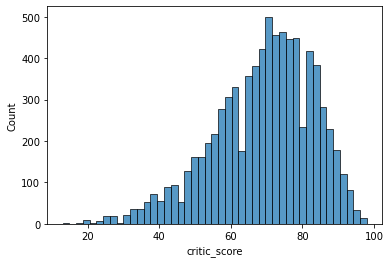

In [6]:
# много пропусков, вероятнее всего оценки просто нет
# посмотрим на распределение
sns.histplot(df['critic_score'])

поставим заглушку на строки с пропусками (чтобы не удалять их и не терять данные) : потом будем их фильтровать

In [7]:
#пропуски заполним -1 и приведём значения к нужному типу
df['critic_score'] = df['critic_score'].fillna(-1)

df['critic_score'] = df['critic_score'].astype('int64')

В основком критики оценивают от 60 до 90

**столбец user_score** - пользовательская оценка

In [8]:
print('доля пропусков = ', df['user_score'].isna().sum() / len(df))
# пропусков очень много

доля пропусков =  0.40173902468685396


In [9]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим что у нас есть пропуски и строковое значение tbd - to be determined - ещё не определено. Ставим заглушки

In [10]:
# ставим заглушку
df['user_score'].replace({'tbd' : '-1'}, inplace= True)
df['user_score'] = df['user_score'].fillna(-1)
# теперь можем привести к нужному типу
df['user_score'] = df['user_score'].astype('float64')

<AxesSubplot:xlabel='user_score', ylabel='Count'>

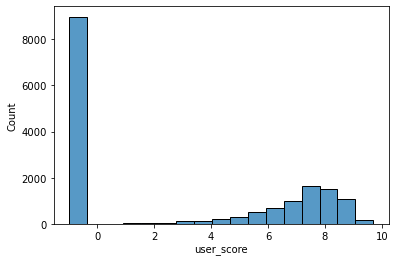

In [11]:
sns.histplot(df['user_score'])

Text(0.5, 1.0, 'распределение пользовательских оценок')

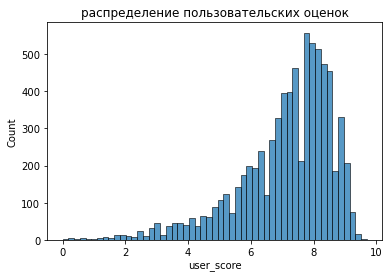

In [12]:
sns.histplot(df.query('user_score >= 0')['user_score'])
plt.title('распределение пользовательских оценок')

Пользователи в основном оценивают от 7 до 9 (10 бальная шкала)

**столбец rating**

Заполнить пропуски в этом столбце сложнее всего, тк это не численные данные


в идеале можно было бы скормить табличку какой нибудь модельке ML и она бы предсказала нам 

In [13]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
df['rating'].isna().sum() / len(df['rating'])
# очень много пропусков

0.4060561838744984

Посмотрим на расшифровку рейтинга

* «EC» («Early childhood») — «Для детей младшего возраста»:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «K-A» («Kids to Adults»)— «Для детей и взрослых»


рейтинг ESRB - рейтинг для США и Канады, а значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры. 

<AxesSubplot:>

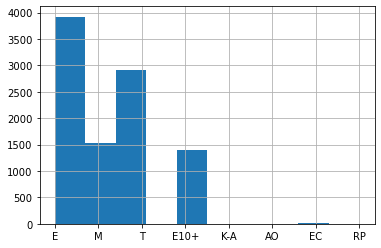

In [15]:
# Поставим заглушку на данные
df['rating'] = df['rating'].fillna('-1')
df.query('rating != "-1"')['rating'].hist()


Видим что больше всего у нас игр категории "для всех" и "подростки"

**Посчитаем суммарные продажи по регионам**

In [16]:
df.info()
# у нас осталось немного пропусков по каждой колонке, удалим эти строки
df = df.dropna(subset = df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
# суммируем продажи по регионам
df['total'] = np.sum(df[['na_sales','eu_sales','jp_sales', 'other_sales']], axis = 1)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,31.38


(0.0, 5.0)

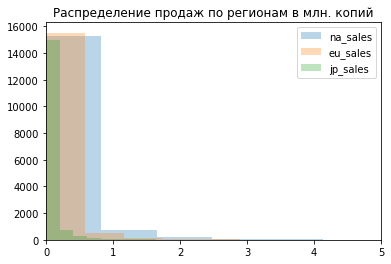

In [18]:
plt.hist(df['na_sales'], label = 'na_sales', alpha = 0.3, bins = 50)
plt.hist(df['eu_sales'], label = 'eu_sales', alpha = 0.3, bins = 50)
plt.hist(df['jp_sales'], label = 'jp_sales', alpha = 0.3, bins = 50)
plt.legend(loc='upper right')
plt.title('Распределение продаж по регионам в млн. копий')
plt.xlim(0, 5)

Видим что основная масса продаж - до 1 млн копий

# Исследовательский анализ данных


## Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [19]:
# сгруппируем по году, посчитаем количество игр
df_ngames = pd.DataFrame(df.groupby('year_of_release')['name'].count().reset_index())

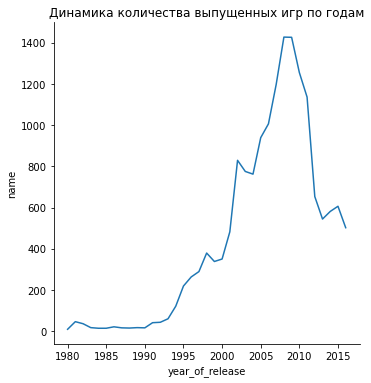

In [20]:

sns.relplot(x = df_ngames.year_of_release, y = df_ngames.name, kind = 'line')
plt.title('Динамика количества выпущенных игр по годам')
print()

---

<div class="alert alert-info">
Наблюдаем сильный скачок после 2000 года, в 2005 уже начали выпускать около 1000 игр/год. 
Актуальными будем считать данные с годом релиза >= 2005
</div>

---

## Как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Изучим за какой характерный срок появляются новые и исчезают старые платформы

In [21]:
# сгруппирем по платформам и году и для каждой платформы посчитаем суммарные продажи по регионам в год
df_platf_sales = df.query('year_of_release > 2005').groupby(['platform', 'year_of_release'])[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# посчитаем суммарные прожажи для каждой платформы в год (сложим все регионы)
df_platf_sales['total_year'] = np.sum(df_platf_sales.iloc[:, 2:], axis = 1)

df_platf_sales.head(8)

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_year
0,3DS,2011.0,27.34,18.63,12.83,4.40,63.20
1,3DS,2012.0,17.11,11.68,19.98,2.59,51.36
2,3DS,2013.0,15.56,14.84,23.57,2.60,56.57
3,3DS,2014.0,12.33,8.73,20.69,2.01,43.76
4,3DS,2015.0,6.17,5.06,15.52,1.03,27.78
5,3DS,2016.0,4.14,2.33,8.03,0.64,15.14
6,DC,2007.0,0.00,0.00,0.02,0.00,0.02
7,DC,2008.0,0.00,0.00,0.04,0.00,0.04


In [22]:
# отсортируем и создадим список названий платформ с наилучшими продажами
top_sales_platform_15 = df_platf_sales.sort_values('total_year', ascending=False).head(20)['platform'].values
top_sales_platform_15 = list(set(top_sales_platform_15))
top_sales_platform_15

['PS3', 'X360', 'DS', 'PS4', 'Wii']

Получили лидеров среди платформ по итоговым продажам, посмтрим их динамику

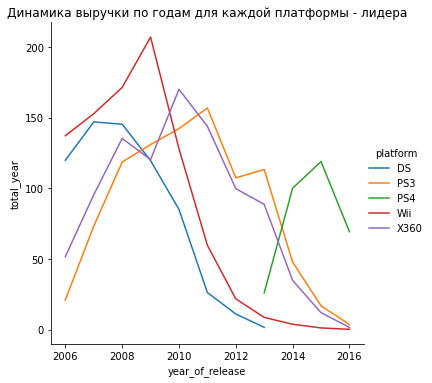

In [23]:
sns.relplot(data = df_platf_sales.query('platform in @top_sales_platform_15'),\
            x = 'year_of_release', y = 'total_year', hue = 'platform', kind = 'line' )
plt.title('Динамика выручки по годам для каждой платформы - лидера')
print()

Микровывод : Характерный срок появления новых платформ - год, устаревают платформы примерно за 2-3 года

**Возьмём данные с 2013 года - В 2010 выпустили рекордное количество игр, нам хватит данных. Мы делаем прогноз на 2017 год - возьмём данные за последние 5 лет**


In [24]:
df_2013 = df.query('year_of_release >= 2013')

## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [25]:
# есть таблица с данными за платформа/год 
df_platf_sales.head()

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_year
0,3DS,2011.0,27.34,18.63,12.83,4.40,63.20
1,3DS,2012.0,17.11,11.68,19.98,2.59,51.36
2,3DS,2013.0,15.56,14.84,23.57,2.60,56.57
3,3DS,2014.0,12.33,8.73,20.69,2.01,43.76
4,3DS,2015.0,6.17,5.06,15.52,1.03,27.78


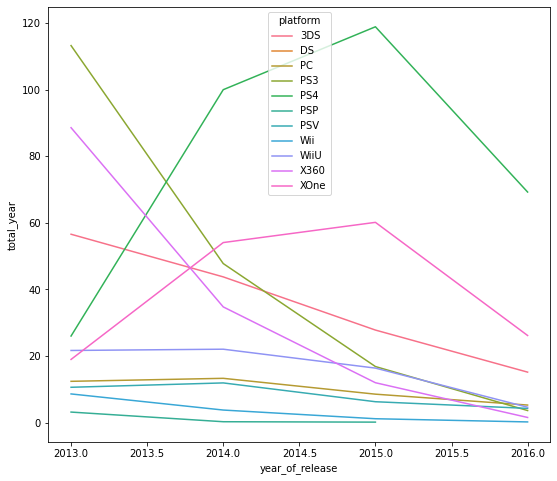

In [26]:
df_platf_sales = df_platf_sales.query('year_of_release > 2012')
plt.figure(figsize=(9,8))
sns.lineplot(data = df_platf_sales, x = 'year_of_release', y = 'total_year', hue = 'platform')
plt.show()


Видим что 
* PS4, XOne, X360 и 3DS падают в продажах но остаются лидерами
* как только начинает падать в продажах версия PS то создаётся новая
* в целом все платформы падают в продажах за 2014-2016 год


## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [27]:
# сгруппируем по платформе и играм, получим суммарный доход с каждой игры на каждой платформе
df_game_sales = df.groupby(['platform', 'name'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
df_game_sales['total_per_game'] = np.sum(df_game_sales.iloc[:, 2:6], axis = 1)
df_game_sales.head()

,platform,name,na_sales,eu_sales,jp_sales,other_sales,total_per_game
0,2600,Action Force,0.50,0.03,0.0,0.01,0.54
1,2600,Adventures of Tron,0.63,0.03,0.0,0.01,0.67
2,2600,Air Raid,0.72,0.04,0.0,0.01,0.77
3,2600,Airlock,0.36,0.02,0.0,0.00,0.38
4,2600,Alien,0.74,0.04,0.0,0.01,0.79


<AxesSubplot:xlabel='platform', ylabel='total_per_game'>

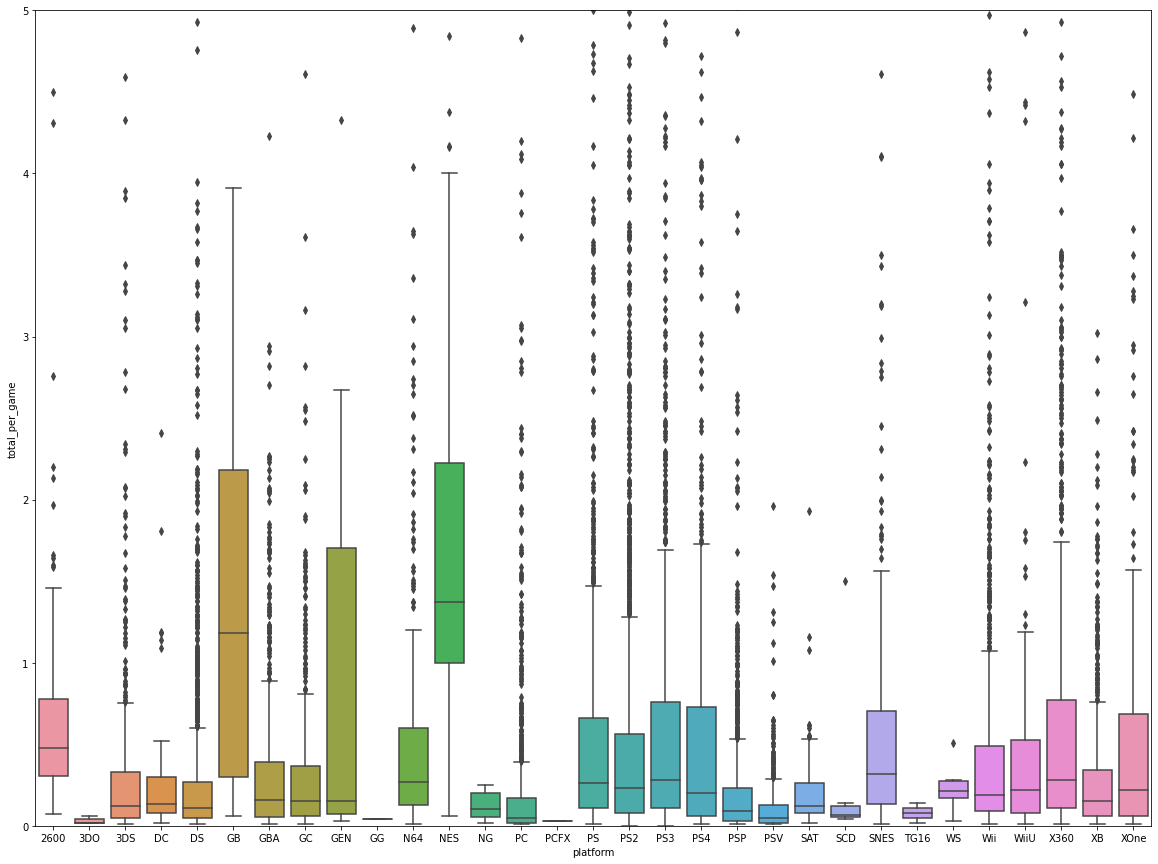

In [28]:
plt.figure(figsize=(20,15))
plt.ylim(0,5)
sns.boxplot(data = df_game_sales, x = 'platform', y = 'total_per_game')

Видим что за весь период больше всего зарабатывают на играх с NES, GB, 2600, PS и Wii/WiiU, X360, XOne

## Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.


Рассмотрим - PS, X360, XOne, PS2, PS4

Будем смотреть глобальную таблицу

In [29]:
# отделим PS и отфильтруем заглушки
df_ps = df.query('platform == "PS3"')
df_ps = df_ps.query('critic_score > 0 & user_score > 0')
df_ps_1 = df_ps[['critic_score', 'user_score', 'total']]
df_ps_1.corr()

,critic_score,user_score,total
critic_score,1.000000,0.631154,0.428213
user_score,0.631154,1.000000,0.143978
total,0.428213,0.143978,1.000000


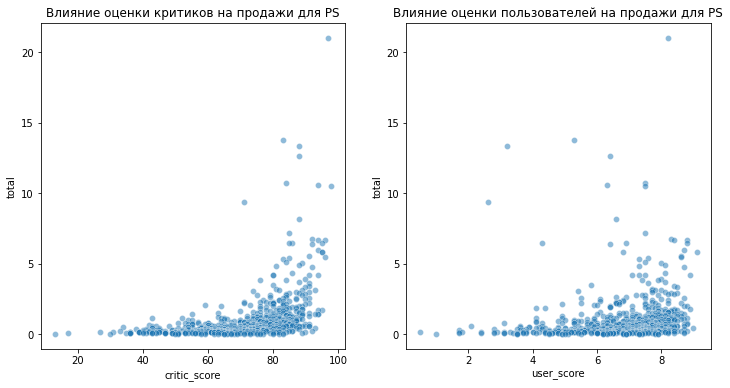

In [30]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_ps_1, x = 'critic_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки критиков на продажи для PS')


plt.subplot(1, 2, 2)
sns.scatterplot(data = df_ps_1, x = 'user_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки пользователей на продажи для PS')

plt.show()

---   
    
    * видим что есть сильная (коэфф = 0,63) зависимость между отзывами критиков и клиентов
    * видим что оценки критиков влияют на продажи сильнее оценок пользователей 
</div>

---

In [31]:
# всё то же самое для XOne
df_x1 = df.query('platform == "XOne"')
df_x1 = df_x1.query('critic_score > 0 & user_score > 0')
df_x1_1 = df_x1[['critic_score', 'user_score', 'total']]
df_x1_1.corr()

,critic_score,user_score,total
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total,0.410422,-0.094003,1.000000


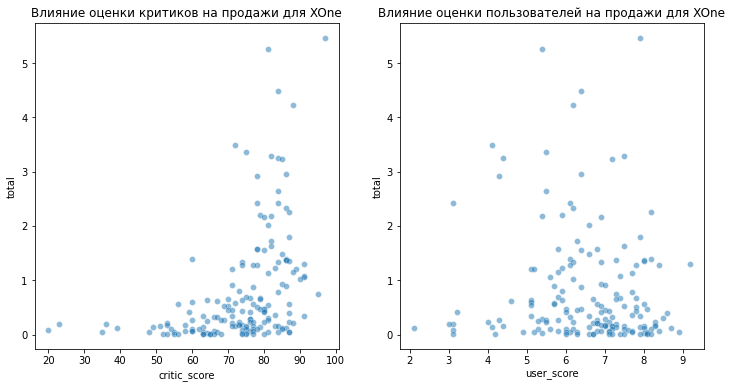

In [32]:

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_x1_1, x = 'critic_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки критиков на продажи для XOne')


plt.subplot(1, 2, 2)
sns.scatterplot(data = df_x1_1, x = 'user_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки пользователей на продажи для XOne')

plt.show()

              critic_score  user_score     total
critic_score      1.000000     0.62502  0.388992
user_score        0.625020     1.00000  0.110280
total             0.388992     0.11028  1.000000


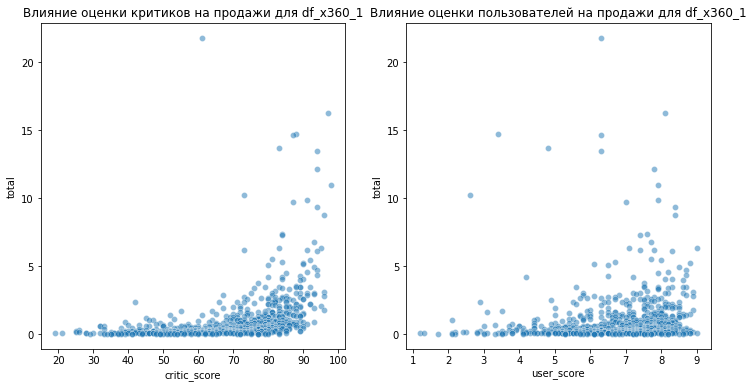

In [33]:
# Для X360
df_x360 = df.query('platform == "X360"')
df_x360 = df_x360.query('critic_score > 0 & user_score > 0')
df_x360_1 = df_x360[['critic_score', 'user_score', 'total']]
print(df_x360_1.corr())

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_x360_1, x = 'critic_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки критиков на продажи для df_x360_1')


plt.subplot(1, 2, 2)
sns.scatterplot(data = df_x360_1, x = 'user_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки пользователей на продажи для df_x360_1')

plt.show()

              critic_score  user_score     total
critic_score      1.000000    0.565841  0.386415
user_score        0.565841    1.000000  0.171690
total             0.386415    0.171690  1.000000


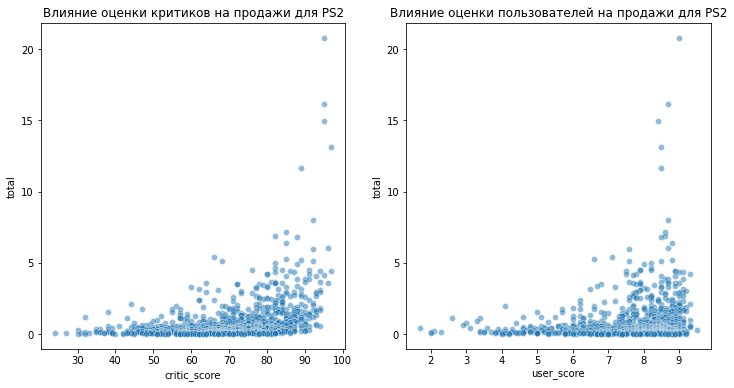

In [34]:
# Для PS2
df_x = df.query('platform == "PS2"')
df_x = df_x.query('critic_score > 0 & user_score > 0')
df_x_1 = df_x[['critic_score', 'user_score', 'total']]
print(df_x_1.corr())

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_x_1, x = 'critic_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки критиков на продажи для PS2')


plt.subplot(1, 2, 2)
sns.scatterplot(data = df_x_1, x = 'user_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки пользователей на продажи для PS2')

plt.show()

              critic_score  user_score     total
critic_score      1.000000    0.557654  0.405895
user_score        0.557654    1.000000 -0.033625
total             0.405895   -0.033625  1.000000


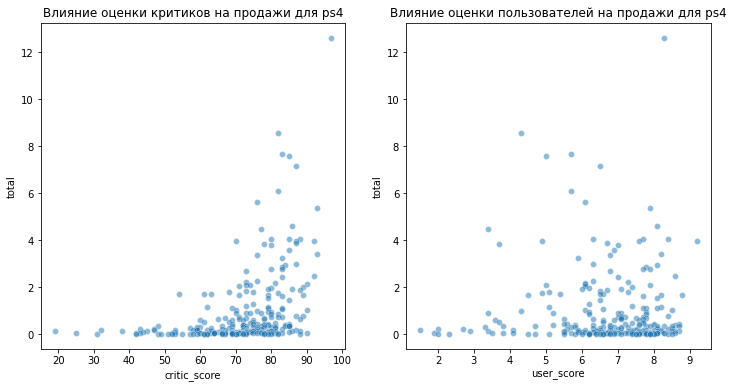

In [35]:
# Для ps4

df_x0 = df.query('platform == "PS4"')
df_x0 = df_x0.query('critic_score > 0 & user_score > 0')
df_x0_1 = df_x0[['critic_score', 'user_score', 'total']]
print(df_x0_1.corr())

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_x0_1, x = 'critic_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки критиков на продажи для ps4')


plt.subplot(1, 2, 2)
sns.scatterplot(data = df_x0_1, x = 'user_score', y = 'total', alpha = 0.5)
plt.title('Влияние оценки пользователей на продажи для ps4')

plt.show()

Везде ситуация примерно одинаковая :
* зависисмость оценка критиков / пользователей - средняя 
* влиянние оценки пользователей на продажи очень слабое
* влияне оценки критиков на продажи больше чем оценки пользователей, но всё равно мало


## Посмотрим на общее распределение игр по жанрам. 
Что можно сказать о
самых прибыльных жанрах? 

Выделяются ли жанры с высокими и низкими
продажами?

Text(0.5, 1.0, 'Число игр по жанрам')

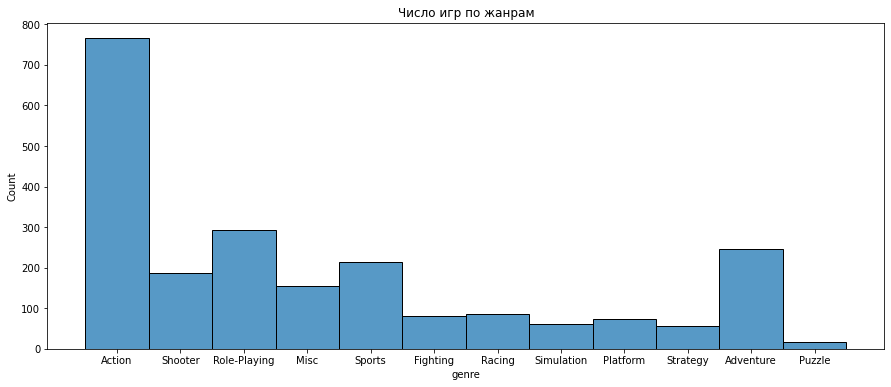

In [36]:
# гистограмма распределения для жанров
plt.figure(figsize=(15,6))
sns.histplot(df_2013.genre)
plt.title('Число игр по жанрам')

Самые популярные - Action, Sports, Adventure, Role-Playing

Посмотрим на какие игры есть постоянный спрос

(0.0, 4.0)

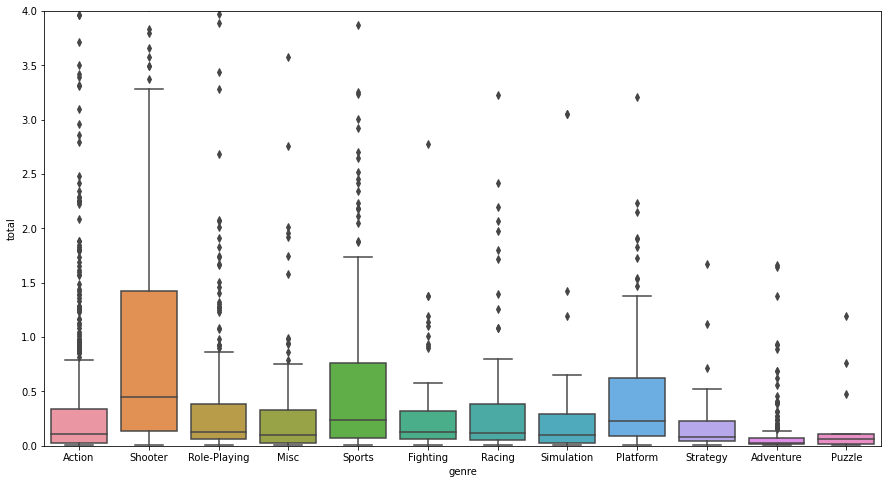

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df_2013, x = 'genre',y = 'total')
plt.ylim(0,4)

---

<div class="alert alert-info">
Cамые прибыльные жанры -  Sports, Shooter, Platform. 
</div>

---

## Определим для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Найдём различия в долях продаж.

In [38]:
# сгруппируем по платфрме, просуммируем продажи по регионам
# создадим отдельно топ 5 датасетов
top_region_na_sales = df_2013.groupby('platform').agg({
    'na_sales' : 'sum',
    'eu_sales' : 'sum',
    'jp_sales' : 'sum'
}).sort_values('na_sales', ascending=False).reset_index().iloc[:5,:2]

top_region_eu_sales = df_2013.groupby('platform').agg({
    'na_sales' : 'sum',
    'eu_sales' : 'sum',
    'jp_sales' : 'sum'
}).sort_values('eu_sales', ascending=False).reset_index().iloc[:5,[0,2]]

top_region_jp_sales = df_2013.groupby('platform').agg({
    'na_sales' : 'sum',
    'eu_sales' : 'sum',
    'jp_sales' : 'sum'
}).sort_values('jp_sales', ascending=False).reset_index().iloc[:5,[0,3]]

In [39]:
# слепим топ-5 платформ по регионам, просуммируем по строкам чтобы получить суммарную прибыль для платформы
# построим график и посмотрим долю, которую занимает тот или иной регион на каждой платформе

top_region = top_region_na_sales.merge(top_region_eu_sales, how = 'outer', \
                          on = 'platform').merge(top_region_jp_sales, how = 'outer', on = 'platform')
top_region = top_region.fillna(0)
top_region

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,0.00
2,X360,81.66,42.52,0.00
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81
5,PSV,0.00,0.00,18.59
6,WiiU,0.00,0.00,10.88


In [40]:
top_region.platform.values

array(['PS4', 'XOne', 'X360', 'PS3', '3DS', 'PSV', 'WiiU'], dtype=object)

Видим что в топ - 5 по продажам в 3х регионах входят платформы 'X360', 'PS4', 'PS3', 'XOne', '3DS', 'PSV', 'WiiU'

In [41]:
platforms = top_region.platform.values
# создадим массив с данными из таблицы выше
ds = np.array([np.array(top_region.iloc[:, 1]), np.array(top_region.iloc[:, 2]), np.array(top_region.iloc[:, 3])])
ds

array([[108.74,  93.12,  81.66,  63.5 ,  38.2 ,   0.  ,   0.  ],
       [141.09,  51.59,  42.52,  67.81,  30.96,   0.  ,   0.  ],
       [ 15.96,   0.  ,   0.  ,  23.35,  67.81,  18.59,  10.88]])

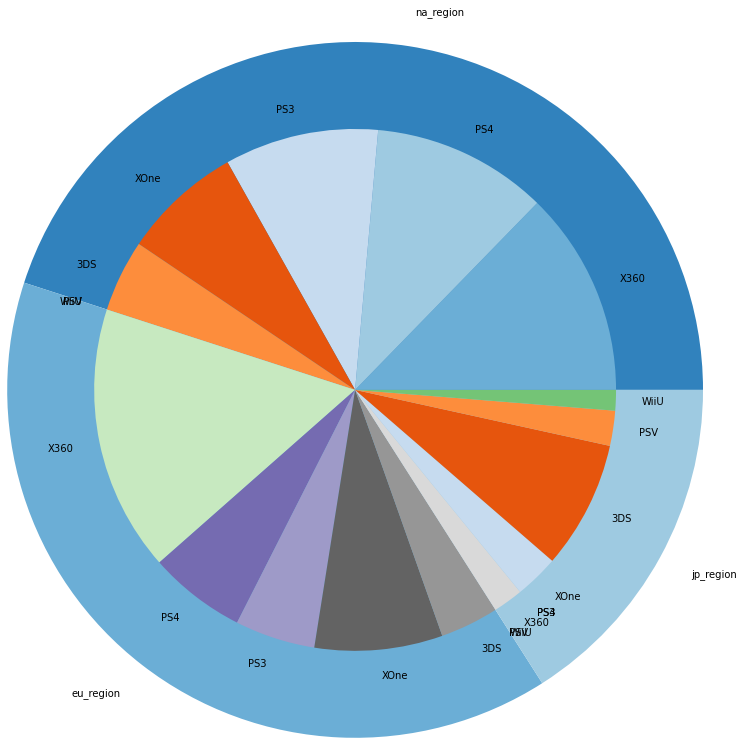

In [42]:
fig, ax = plt.subplots()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3))
inner_colors = cmap(np.array([1,2,3,4,5, 9, 10, 11, 12, 13,16,17,18,19,20]))


ax.pie(ds.sum(axis=1), radius=4,labels= ['na_region', 'eu_region', 'jp_region'], colors=outer_colors)

ax.pie(ds.flatten(), radius=3, labels= ['X360', 'PS4', 'PS3', 'XOne', '3DS', 'PSV', 'WiiU',\
                                           'X360', 'PS4', 'PS3', 'XOne', '3DS', 'PSV', 'WiiU',\
                                           'X360', 'PS4', 'PS3', 'XOne', '3DS', 'PSV', 'WiiU'], colors=inner_colors,)

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

На pie-графике видим долю каждой платформы в каждом регионе, видим что больая доля рынка у Америки, далее идут Европа и Япония.

3DS преобладает в Японии

PS3, PS4 популярны в Америке и в Европе

X360 - самая прибыльная в NA и EU

### Самые популярные жанры (топ-5).

In [43]:
# создадим таблицы с самыми популярными жанрами по регионам
top_genre_na_sales = df_2013.groupby('genre')[['na_sales', 'eu_sales',\
                         'jp_sales']].sum().reset_index().sort_values('na_sales',ascending = False).iloc[:5, [0,1]]
top_genre_na_sales

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [44]:
top_genre_eu_sales = df_2013.groupby('genre')[['na_sales', 'eu_sales',\
                         'jp_sales']].sum().reset_index().sort_values('eu_sales',ascending = False).iloc[:5, [0,2]]
top_genre_eu_sales

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [45]:
top_genre_jp_sales = df_2013.groupby('genre')[['na_sales', 'eu_sales',\
                         'jp_sales']].sum().reset_index().sort_values('jp_sales',ascending = False).iloc[:5, [0,3]]
top_genre_jp_sales

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


Action, Role-Playing, Shooter входят в топ-5 по всем регионам.

Sports для NA и EU.
 
Music для JP и NA

Fighting для  JP

### Влияет ли рейтинг ESRB на продажи в отдельном регионе? 


In [46]:
df_2013['rating'].unique()

array(['M', '-1', 'E', 'T', 'E10+'], dtype=object)

Вспомним

* «EC» («Early childhood») — «Для детей младшего возраста»:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «K-A» («Kids to Adults»)— «Для детей и взрослых»


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

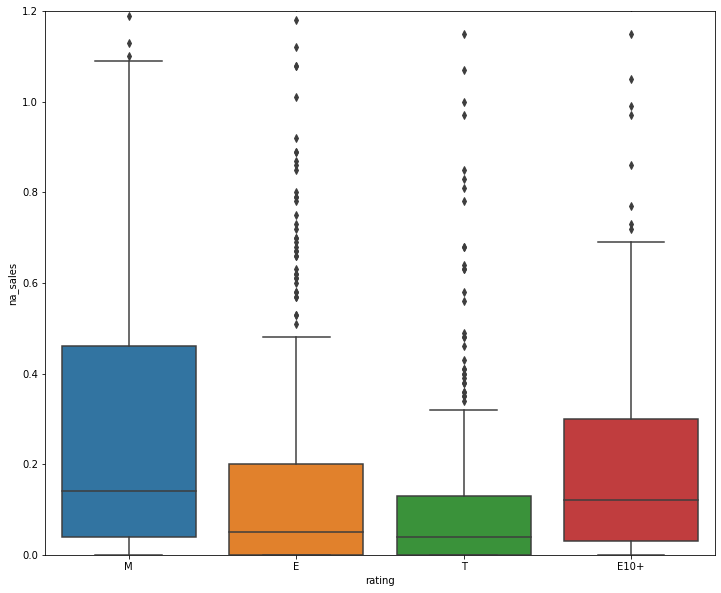

In [47]:
# псмотрим на средние продажи в NA по рейтингам
plt.figure(figsize=(12,10))
plt.ylim(0,1.2)
sns.boxplot(x = df_2013.query('rating != "-1"')['rating'], y = df_2013.query('rating != "-1"')['na_sales'])

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

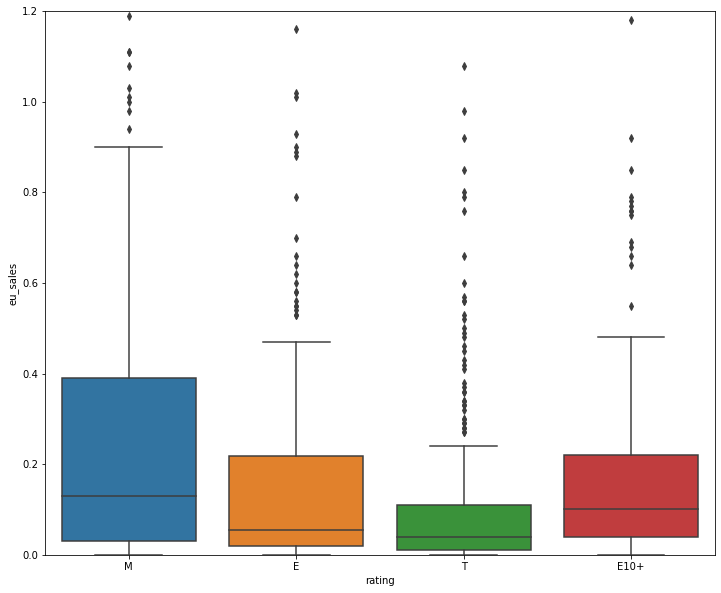

In [48]:
# псмотрим на средние продажи в  EU по рейтингам
plt.figure(figsize=(12,10))
plt.ylim(0,1.2)
sns.boxplot(x = df_2013.query('rating != "-1"')['rating'], y = df_2013.query('rating != "-1"')['eu_sales'])

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

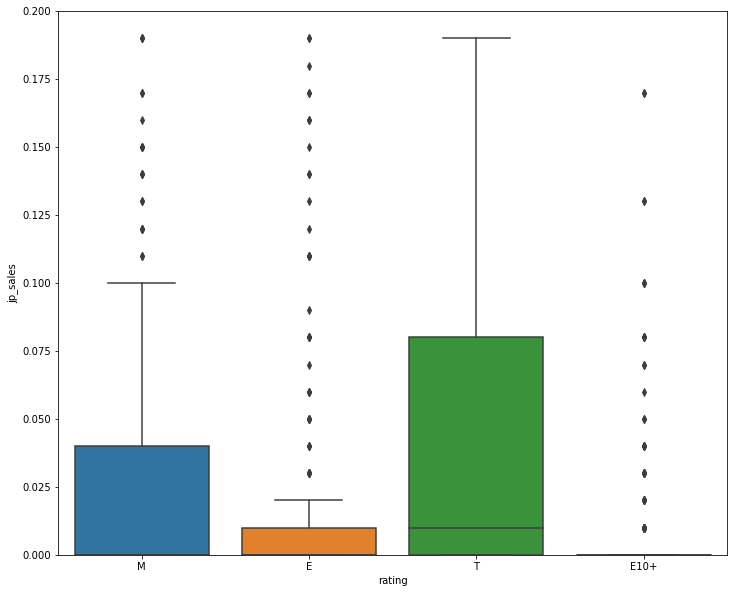

In [49]:
# в JP
plt.figure(figsize=(12,10))
plt.ylim(0,0.2)
sns.boxplot(x = df_2013.query('rating != "-1"')['rating'], y = df_2013.query('rating != "-1"')['jp_sales'])

В NA и EU ситуации похожие:

Видим что со взлослых зарабатывают больше всего (логично, тк это более платёжеспособные люди чем подростки)

С подростков, людей старше 10ти примерно одинаково


------
В JP больше всего зарабатывают с T - для подростков и  M- для взрослых 

## Гипотезы
### Гипотеза первая

H0_1 =  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1_1 = Они не равны

Text(0.5, 1.0, 'Распределение пользовательских оценок для PC')

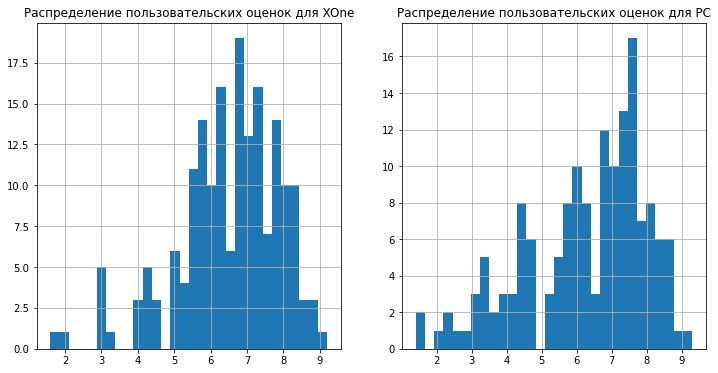

In [50]:
# посмтрим на распределения и дисперсии

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
df_2013.query('platform == "XOne" & user_score !=-1')['user_score'].hist(bins = 30)
plt.title('Распределение пользовательских оценок для XOne')
plt.subplot(1, 2, 2)
df_2013.query('platform == "PC"& user_score !=-1')['user_score'].hist(bins = 30)
plt.title('Распределение пользовательских оценок для PC')

In [51]:
print('Дисперсия XOne = ' ,df_2013.query('platform == "XOne" & user_score !=-1')['user_score'].var())

Дисперсия XOne =  1.9069968429360702


In [52]:
print('Дисперсия PC = ' ,df_2013.query('platform == "PC" & user_score !=-1')['user_score'].var())
# будем считать дисперсии равными
# распределения не похожи на нормальные, значит t-test скорее всего будет ошибаться

Дисперсия PC =  3.035892752408884


In [53]:
# пусть альфа = 0,01
stats.ttest_ind(df_2013.query('platform == "XOne" & user_score !=-1')['user_score'], \
                df_2013.query('platform == "PC" & user_score !=-1')['user_score'], equal_var=True)

Ttest_indResult(statistic=1.4788255981357277, pvalue=0.14012658403611647)

Получили pvalue=0.14 > 0.01

Значит недостаточно оснований отвергнуть нулевую гипотезу о том, что средние равны

Проведём непараметрический тест 

In [54]:
stats.mannwhitneyu(df_2013.query('platform == "XOne" & user_score !=-1')['user_score'], \
                df_2013.query('platform == "PC" & user_score !=-1')['user_score'])

MannwhitneyuResult(statistic=13505.0, pvalue=0.2505503367311187)

pvalue=0,25 > 0,01, значит нулевая гипотеза остаётся не отвергнутой

### Гипотеза вторая




H0_2 = Средние пользовательские рейтинги жанров Action  и Sports одинаковые.

H1_2 = Средние пользовательские рейтинги жанров Action и Sports разные.

<AxesSubplot:>

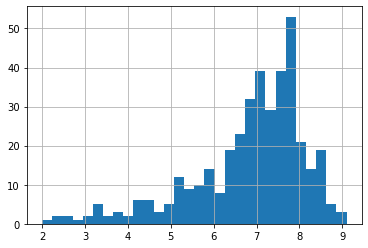

In [55]:
df_2013.query('genre == "Action" & user_score !=-1')['user_score'].hist(bins = 30)

<AxesSubplot:>

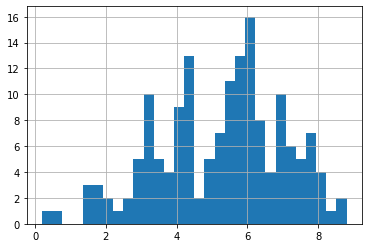

In [56]:
df_2013.query('genre == "Sports" & user_score !=-1')['user_score'].hist(bins = 30)

---

<div class="alert alert-info">
<h2> Комментарий от студента</h2>    

нельзя проводить тест М-У, смотрим сразу на т-тест
</div>

---

In [58]:
stats.ttest_ind(df_2013.query('genre == "Action" & user_score !=-1')['user_score'], \
                df_2013.query('genre == "Sports"  & user_score !=-1')['user_score'], equal_var=True)

Ttest_indResult(statistic=11.535100577928208, pvalue=1.0517832389140023e-27)

pvalue << 0.01 можем отклонить нулевую гипотезу

## Общий вывод и рекомендации

Итак , мы выяснили,что характерный срок появления новых платформ - год, устаревают платформы примерно за 2-3 года

* PS4, XOne, X360 и 3DS падают в продажах но остаются лидерами
* как только начинает падать в продажах версия PS то создаётся новая
* в целом все платформы падают в продажах за 2014-2016 год
* Видим что за весь период больше всего зарабатывают на играх с NES, GB, 2600, PS и Wii/WiiU, X360, XOne

----------------------------------------
* оценка критиков / пользователей средне коррелируют
* влиянние оценки пользователей слабое
* влияне оценки критиков больше чем оценки пользователей, но всё равно мало


* самые популярные жанры в общем распределении -  Action, Sports, Adventure, Role-Playing
* самые прибыльные жанры -  Sports, Shooter, Platform.


* платформы 'X360', 'PS4', 'PS3', 'XOne', '3DS', 'PSV', 'WiiU' являются самыми популярными
* 3DS преобладает в Японии

* PS3, PS4, X360 популярны в Америке и в Европе

------------
Для игр вышедших после 2013 года включительно:
* Action, Role-Playing, Shooter входят в топ-5 по всем регионам.
* Sports популярен для NA и EU.

* Music для JP и NA

* Fighting для JP

**связь рейтинга ESRB и продаж**
* В NA и EU ситуации похожие:


Видим что со взлослых зарабатывают больше всего (логично, тк это более платёжеспособные люди чем подростки)

С подростков, людей старше 10ти, и детей младшего возраста примерно одинаково


* В JP:

больше всего зарабатывают с  подростков и  взрослых

**гипотезы**

Гпотеза 1:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* не удалось отвергнуть

Гипотеза 2:

* Средние пользовательские рейтинги жанров Action и Sports одинаковые.

* удалось отвергнуть , то есть они разные (у Action больше)

# Рекомендации 

PS3, PS4, XOne пользуется постоянным спросом, являются самыми прибыльными, лучше инвестировать в них

Из жанров стоит выбирать Action, Role-Playing или Shooter

Рейтингу лучше быть категории "для взрослых", или "старше 10"